In [509]:
import pandas as pd
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [480]:
df_red = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
    sep = ';')
df_white = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    sep = ';')
_df = pd.concat((df_red, df_white))

# normalize
df = (_df - _df.min()) / (_df.max() - _df.min())
X = df.drop('quality', axis=1).to_numpy()
Y = df['quality'].to_numpy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


In [481]:
beta2 = cvx.Variable(X.shape[1])
objective2 = cvx.Minimize(cvx.norm2(Y - X @ beta2))
prob2 = cvx.Problem(objective2)
prob2.solve(verbose=False)
Y_pred2 = X@beta2.value

In [482]:
beta1 = cvx.Variable(X.shape[1])
objective1 = cvx.Minimize(cvx.norm1(Y - X @ beta1))
prob1 = cvx.Problem(objective1)
prob1.solve(verbose=False)
Y_pred1 = X@beta1.value

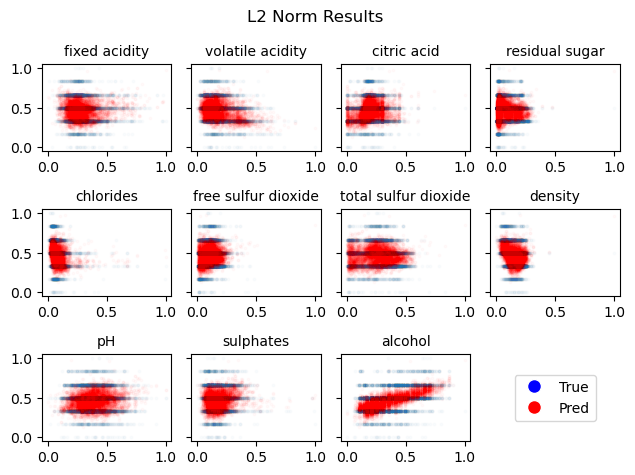

In [554]:
fig, axs = plt.subplots(3,4, sharey=True)
fig.suptitle("L2 Norm Results")
idx = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        ax = axs[i,j]
        if idx < 11:
            ax.set_title(df.columns[idx], fontsize=10)
            ax.scatter(X[:,idx], Y, alpha=0.02, s=3)
            ax.scatter(X[:,idx], Y_pred2, alpha=0.02, s=3, c='red')
            idx += 1
        else:
            ax.axis('off')
            ax.legend(handles = [
                Line2D([0], [0], marker='o', color='w', label='True', markerfacecolor='b', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='Pred', markerfacecolor='r', markersize=10),
            ], loc='center')

plt.tight_layout()
# plt.savefig("L2_scatter.pdf")
plt.savefig("L2_scatter.png", dpi=300)

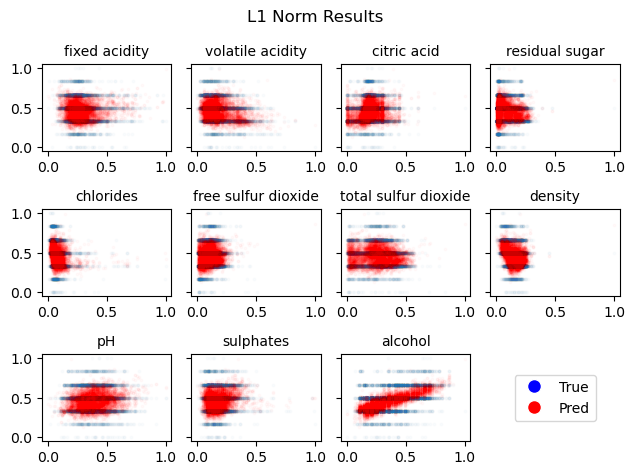

In [555]:
fig, axs = plt.subplots(3,4, sharey=True)
fig.suptitle("L1 Norm Results")
idx = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        ax = axs[i,j]
        if idx < 11:
            ax.set_title(df.columns[idx], fontsize=10)
            ax.scatter(X[:,idx], Y, alpha=0.02, s=3)
            ax.scatter(X[:,idx], Y_pred1, alpha=0.02, s=3, c='red')
            idx += 1
        else:
            ax.axis('off')
            ax.legend(handles = [
                Line2D([0], [0], marker='o', color='w', label='True', markerfacecolor='b', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='Pred', markerfacecolor='r', markersize=10),
            ], loc='center')
            
plt.tight_layout()
plt.savefig("L1_scatter.png", dpi=300)
# plt.savefig("L1_scatter.pdf")

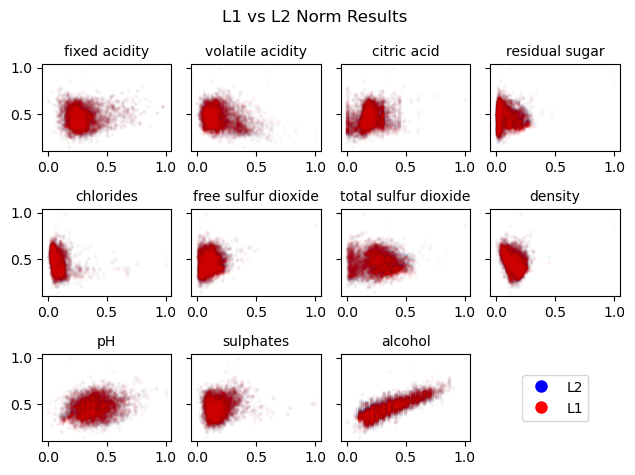

In [523]:
fig, axs = plt.subplots(3,4, sharey=True)
fig.suptitle("L1 vs L2 Norm Results")
idx = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        ax = axs[i,j]
        if idx < 11:
            ax = axs[i,j]
            ax.set_title(df.columns[idx], fontsize=10)
            ax.scatter(X[:,idx], Y_pred2, alpha=0.02, s=3)
            ax.scatter(X[:,idx], Y_pred1, alpha=0.02, s=3, c='red')
            idx += 1
        else:
            ax.axis('off')
            ax.legend(handles = [
                Line2D([0], [0], marker='o', color='w', label='L2', markerfacecolor='b', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='L1', markerfacecolor='r', markersize=10),
            ], loc='center')

plt.tight_layout()

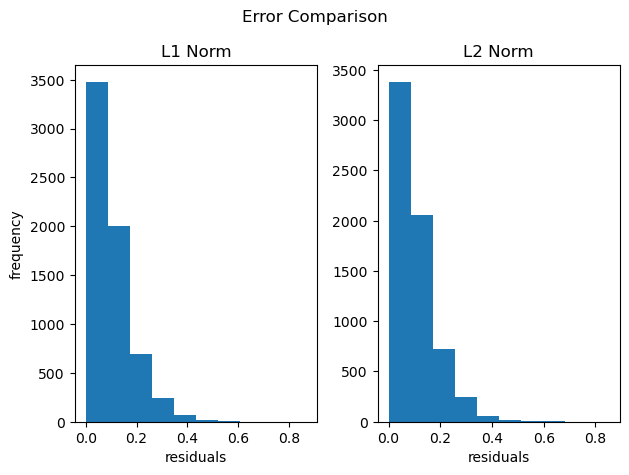

In [547]:
fig, axs = plt.subplots(1,2)
fig.suptitle("Error Comparison")
e_norm1 = abs(Y - Y_pred1)
e_norm2 = abs(Y - Y_pred2)
axs[0].hist(e_norm1)
axs[0].set(xlabel="residuals", title="L1 Norm", ylabel="frequency")
axs[1].hist(e_norm2)
axs[1].set(xlabel="residuals", title="L2 Norm")
plt.tight_layout()
plt.savefig("residuals.pdf")
plt.show()

In [534]:
print(' '*20, '  β1', '\t', 'β2')
for i,feature in enumerate(df.columns[:-1]):
    print(feature.ljust(20,' '), ':', round(beta1.value[i],2), '\t', round(beta2.value[i],2))

                       β1 	 β2
fixed acidity        : 0.26 	 0.22
volatile acidity     : -0.24 	 -0.29
citric acid          : 0.04 	 0.05
residual sugar       : 0.33 	 0.28
chlorides            : 0.03 	 0.07
free sulfur dioxide  : 0.41 	 0.34
total sulfur dioxide : 0.01 	 0.08
density              : 0.05 	 0.24
pH                   : 0.27 	 0.24
sulphates            : 0.21 	 0.19
alcohol              : 0.55 	 0.56


In [558]:
# get rid of outliers
dist_cutoff = 0.40
avg_distances = (abs(Y - Y_pred1) + abs(Y - Y_pred2)) / 2
print(sum(avg_distances > dist_cutoff))

gone = df[avg_distances >= dist_cutoff]

idx_arr = np.full(df.shape[0],False)
idx_arr[100:1200] = True
df_rm_out = df[avg_distances < dist_cutoff]
print(df_rm_out.shape)
Xb = df_rm_out.drop('quality', axis=1).to_numpy()
Yb = df_rm_out['quality'].to_numpy()

40
(6457, 12)


In [559]:
Xb = df_rm_out.drop('quality', axis=1).to_numpy()
Yb = df_rm_out['quality'].to_numpy()

In [560]:
beta2b = cvx.Variable(Xb.shape[1])
objective2 = cvx.Minimize(cvx.norm2(Yb - Xb @ beta2b))
prob2 = cvx.Problem(objective2)
prob2.solve(verbose=False)
Y_pred2b = Xb@beta2b.value

In [561]:
beta1b = cvx.Variable(Xb.shape[1])
objective2 = cvx.Minimize(cvx.norm1(Yb - Xb @ beta1b))
prob2 = cvx.Problem(objective2)
prob2.solve(verbose=False)
Y_pred1b = Xb@beta1b.value

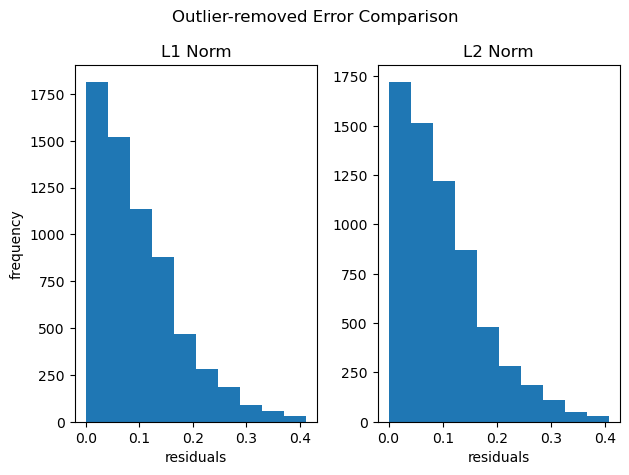

In [562]:
fig, axs = plt.subplots(1,2)
fig.suptitle("Outlier-removed Error Comparison")
e_norm1 = abs(Yb - Y_pred1b)
e_norm2 = abs(Yb - Y_pred2b)
axs[0].hist(e_norm1)
axs[0].set(xlabel="residuals", title="L1 Norm", ylabel="frequency")
axs[1].hist(e_norm2)
axs[1].set(xlabel="residuals", title="L2 Norm")
plt.tight_layout()
plt.savefig("outlier_rm_residuals.pdf")
plt.show()

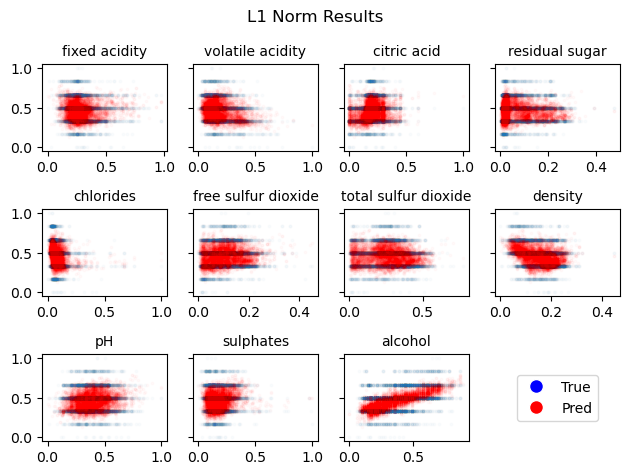

In [563]:
fig, axs = plt.subplots(3,4, sharey=True)
fig.suptitle("L1 Norm Results")
idx = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        ax = axs[i,j]
        if idx < 11:
            ax.set_title(df.columns[idx], fontsize=10)
            ax.scatter(Xb[:,idx], Yb, alpha=0.02, s=3)
            ax.scatter(Xb[:,idx], Y_pred1b, alpha=0.02, s=3, c='red')
            idx += 1
        else:
            ax.axis('off')
            ax.legend(handles = [
                Line2D([0], [0], marker='o', color='w', label='True', markerfacecolor='b', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='Pred', markerfacecolor='r', markersize=10),
            ], loc='center')
            

plt.tight_layout()